Sales data (2018-07-01 ~ 2018-07-08)  analysis report 

In [391]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from matplotlib import rcParams
gy_cps = pd.read_csv('/Users/xiaxin/Desktop/gy_cps_data.csv', encoding='gbk') 
rcParams['font.sans-serif'] = ['SimHei']

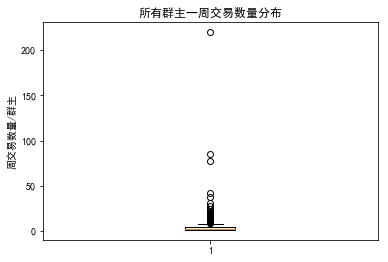

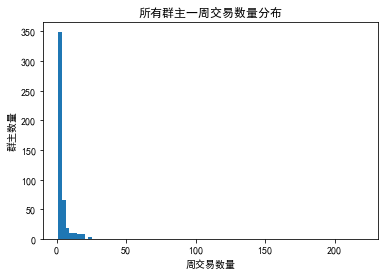

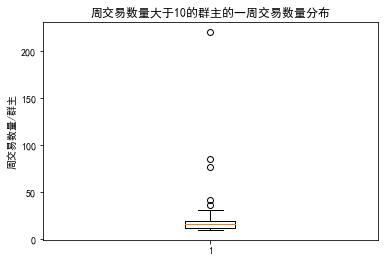

群主的总数: 483
周交易数量大于10的群主的总数: 49


In [387]:
#group
dict_group = {}
for i in range(len(gy_cps)):
    group_id = gy_cps['o_p_mm2'].iloc[i]
    if group_id in dict_group.keys():
        dict_group[group_id] += 1
    else:
        dict_group[group_id] = 1

group_id = list(dict_group.keys())
trans_amount_weekly = list(dict_group.values())

df_group = pd.DataFrame(columns = ['group_id', 'trans_amount_weekly'])
for i in range(len(group_id)):
    df_group.loc[i, 'group_id'] = group_id[i]
    df_group.loc[i, 'trans_amount_weekly'] = trans_amount_weekly[i]

group_count_ge10 = []
for item in trans_amount_weekly:
    if item >= 10:
        group_count_ge10.append(item)
        
plt.boxplot(trans_amount_weekly)
plt.ylabel('周交易数量/群主')
plt.title('所有群主一周交易数量分布')
plt.show()

plt.hist(trans_amount_weekly, 80)
plt.xlabel('周交易数量')
plt.ylabel('群主数量')
plt.title('所有群主一周交易数量分布')
plt.show()

plt.boxplot(group_count_ge10)
plt.ylabel('周交易数量/群主')
plt.title('周交易数量大于10的群主的一周交易数量分布')
plt.show()

print('群主的总数: ' + str(len(group_id)))
print('周交易数量大于10的群主的总数: ' + str(len(group_count_ge10)))
#print('周交易数量大于10的群主及其一周交易数量列表：')
#print(df_group[df_group['trans_amount_weekly']>=10].sort_values(by='trans_amount_weekly', ascending=False))

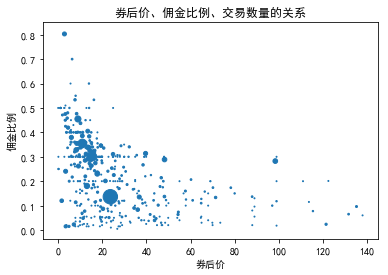

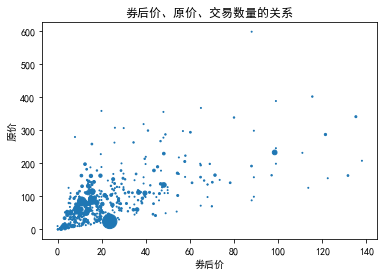

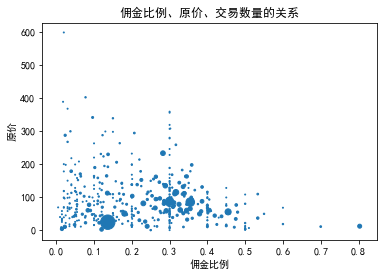

1.券后价: 价格集中在0-30元;
2.原价: 价格集中在0-100元;
3.佣金比例: 有一些固定值，主要集中在0.3-0.4
5.交易数量和券后价、佣金比例的关系: 佣金比例越低,商品价格范围越大，佣金比例0.2-0.5，价格0-30的商品交易数量更大
6.交易数量和券后价、原价的关系: 券后价偏离原价较大。原价很高，优惠券面额很大（偏离5倍左右）的商品受青睐
7.交易数量和原价、佣金比例的关系: 佣金比例0.2-0.5，价格0-20的商品交易数量更大


In [201]:
# relationshio between amount sold, price after discount, coupon
# -*- coding: utf-8 -*-
gy_cps_agg = pd.read_csv('/Users/xiaxin/Desktop/gy_cps_query_result.csv', encoding='gbk') 
gy_cps_agg_g1 = gy_cps_agg[gy_cps_agg['avg_new_price']<=150]
plt.scatter(gy_cps_agg_g1['avg_new_price'], gy_cps_agg_g1['avg_promo_rate'], 
            s=gy_cps_agg_g1['trans_amount_weekly'])
plt.xlabel('券后价')
plt.ylabel('佣金比例')
plt.title('券后价、佣金比例、交易数量的关系')
plt.show()

plt.scatter(gy_cps_agg_g1['avg_new_price'], gy_cps_agg_g1['avg_original_price'], 
            s=gy_cps_agg_g1['trans_amount_weekly'])
plt.xlabel('券后价')
plt.ylabel('原价')
plt.title('券后价、原价、交易数量的关系')
plt.show()

plt.scatter(gy_cps_agg_g1['avg_promo_rate'], gy_cps_agg_g1['avg_original_price'], 
            s=gy_cps_agg_g1['trans_amount_weekly'])
plt.xlabel('佣金比例')
plt.ylabel('原价')
plt.title('佣金比例、原价、交易数量的关系')
plt.show()

print('1.券后价: 价格集中在0-30元;')
print('2.原价: 价格集中在0-100元;')
print('3.佣金比例: 有一些固定值，主要集中在0.3-0.4')
print('5.交易数量和券后价、佣金比例的关系: 佣金比例越低,商品价格范围越大，佣金比例0.2-0.5，价格0-30的商品交易数量更大')
print('6.交易数量和券后价、原价的关系: 券后价偏离原价较大。原价很高，优惠券面额很大（偏离5倍左右）的商品受青睐')
print('7.交易数量和原价、佣金比例的关系: 佣金比例0.2-0.5，价格0-20的商品交易数量更大')

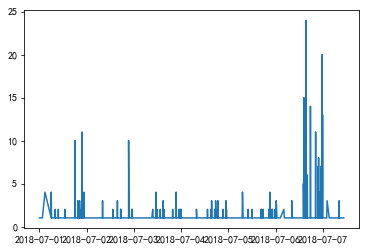

In [416]:
# Time Seires
import datetime
o_creattime = gy_cps['o_creattime']

def timestamp_datetime(value):
    format = '%y-%m-%d %H'
    value = time.localtime(value)
    dt = time.strftime(format, value)
    return dt
o_creattime_dt = []
for i in range(len(o_creattime)):
    o_creattime_dt.append(datetime.datetime.fromtimestamp(o_creattime[i]))
gy_cps['o_creattime_dt'] = o_creattime_dt

time_series = gy_cps.groupby('o_creattime_dt', as_index = False)['o_buynum'].count()
plt.plot(time_series['o_creattime_dt'], time_series['o_buynum'])
plt.show()

In [418]:
# Category
category_agg = gy_cps.groupby('hepburn_category_level_1', as_index=False)['o_buynum'].count()
print(category_agg.sort_values(by='o_buynum', ascending=False))

   hepburn_category_level_1  o_buynum
9                      百货食品       736
5                      服装鞋包       331
1                      家居建材       255
10                     美妆饰品       211
3                      手机数码       176
6                      母婴用品       170
8                      生活服务        70
2                      家用电器        58
11                     运动户外        56
4                      文化玩乐        43
7                      汽配摩托        23
0                        其他        18


In [458]:
# groups with weekly sales >= 50
group_agg = gy_cps.groupby('o_p_mm2', as_index=False)['o_buynum'].count()
group_agg_ge_40 = group_agg[group_agg['o_buynum']>=50]
print(group_agg_ge_30.sort_values(by='o_buynum', ascending=False))

       o_p_mm2  o_buynum
371  650672578       220
98   650636726        85
410  650682056        77
72   650628752        42
